In [1]:
import numpy as np

def step_fun(x):

    return np.where(x > 0 , 1, 0)

class perceptron:
    def __init__(self, lr, Epoch):
        self.lr = lr
        self.Epoch = Epoch
        self.W = None


    def predict(self, x):
        return step_fun(np.dot(x, self.W[1:]) + self.W[0])

    def fit(self, X, Y):
        n, p = X.shape
        self.W = np.zeros(p + 1)
        for i in range(self.Epoch):
            for inputs, label in zip(X, Y):
                prediction = self.predict(inputs)
                self.W[1:] += self.lr * (label - prediction) * inputs
                self.W[0] += self.lr * (label - prediction)




In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

p = perceptron(lr=0.01, Epoch=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("Perceptron classification accuracy", accuracy(y_test, predictions))



Perceptron classification accuracy 1.0


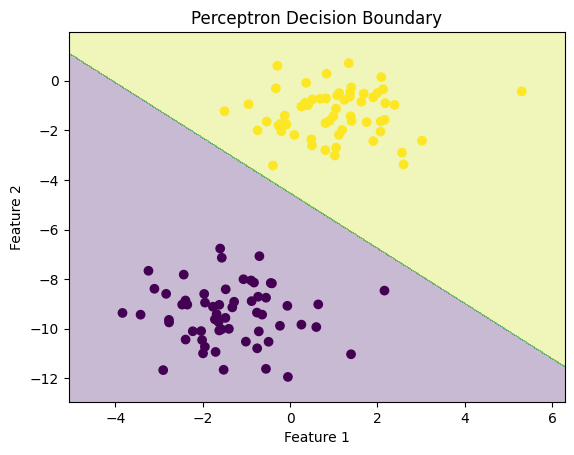

In [3]:
# Define the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = p.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and scatter plot
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker="o")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Perceptron Decision Boundary")
plt.show()
